In [2]:
from earlyexitnet.training_tools.train import get_model
from earlyexitnet.tools import load_model, CIFAR10DataColl
import torch

# model_path = '../trained_models/b_lenet_cifar10.pth'
# model = get_model("b_lenet_cifar")

model_path = '../../trained_models/resnet8_2ee_230721.pth'
model = get_model("resnet8_2ee")
load_model(model, model_path,device=torch.device('cuda:0'))

Classif @ 0 linear dim: 512
Model done: resnet8_2ee


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

BATCH_SIZE = 40

datacoll = CIFAR10DataColl(batch_size_test=BATCH_SIZE)
test_dl = datacoll.get_test_dl()


Files already downloaded and verified
Files already downloaded and verified


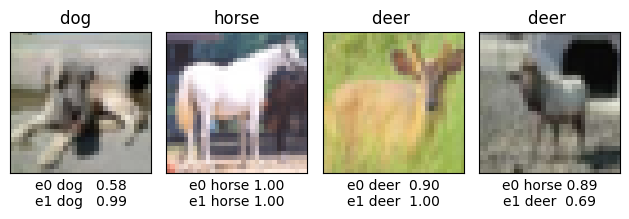

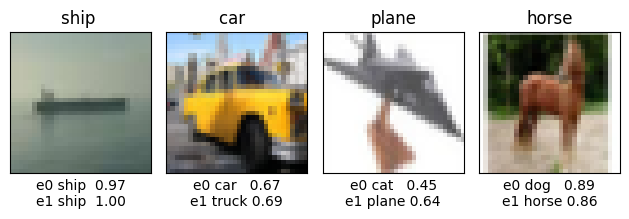

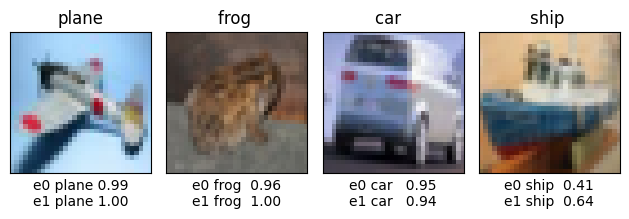

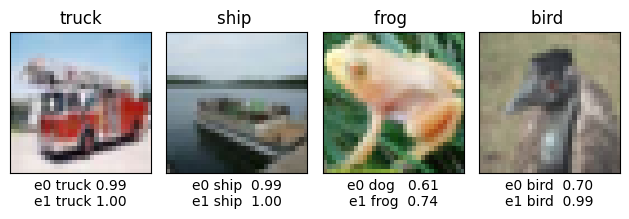

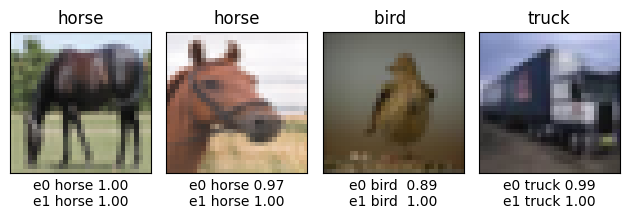

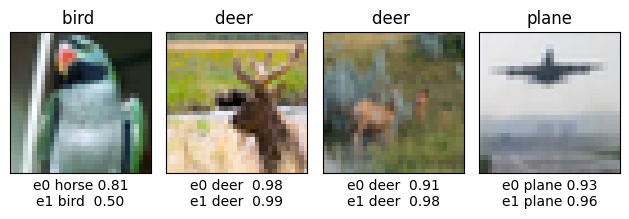

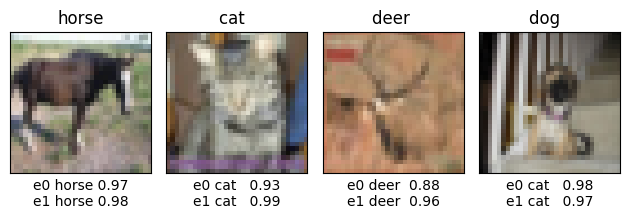

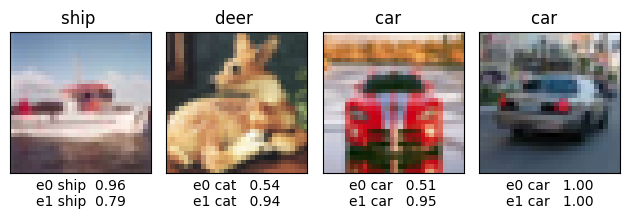

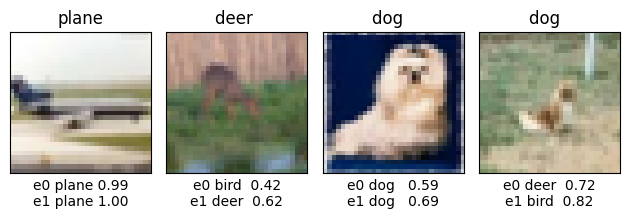

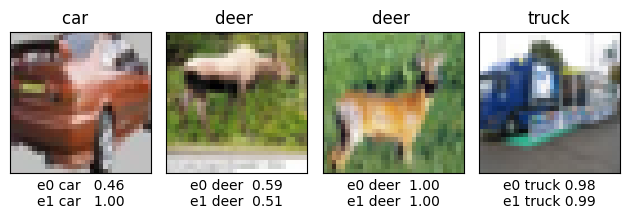

In [4]:
# %matplotlib ipympl needs ipywidgets
import math
from IPython.core.debugger import set_trace

# list of classes for cifar10 dataset (matches indices)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# NOTE imshow not the best name for this as matplotlib has a real version
def imshow(img, ncols=1, label=None, caption=None):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy() # convert to numpy array
    num_img = npimg.shape[0] # get number of images
    # calculate how many rows based on the number of images and the cols requested
    nrows = math.ceil(num_img / ncols)

    # a counting variable for the number of images in a batch?
    img_track = 0
    
    for row in range(nrows):
        # start new subplot set for each row
        fig, axs = plt.subplots(nrows=1, ncols=ncols,
                                subplot_kw={'xticks': [], 'yticks': []})
        
        for ax in axs:
            if img_track < num_img:#
                # while we haven't exceeded the batch number do:
                # display a single image
                # transposes the image and the batch number?
                ax.imshow(np.transpose(npimg[img_track], (1, 2, 0)))
                if label is not None:
                    # set the figure title to the batched labels
                    ax.set_title(label[img_track])
                if caption is not None:
                    # set the cpation below the image to the same index as the image
                    ax.set_xlabel(caption[img_track])
            img_track += 1
        # squishy squishy
        plt.tight_layout()
        # plt.imshow(np.transpose(npimg, (1, 1, 1)))
        plt.show()

def getcaption(images, model):
    # get the caption info for a batch of images
    # set to eval mode (not fast eval)
    model.eval()
    # pre-load empty strings for each image in a list
    captions = ['' for i in range(BATCH_SIZE)]
    with torch.no_grad(): # just saves storing gradient info I think
        # get the logit outputs for each item in the batch
        result = model.forward(images)
        # compute the max value of the resulting output after softmax normilisation
        top1sftmx = torch.max(torch.softmax(result, dim=-1),dim=-1).values
        # compute the max val of each of the logits (should match the index of the top1softmx)
        #res_max = result.max(dim=-1).values
        # get the index of the above
        res_arg_max = result.max(dim=-1).indices
        for exit_num, (t1max, arg_max) in enumerate(zip(top1sftmx, res_arg_max)):
            # look at the top1 res of the softmax and the result index for each exit
            for i, (max_val, index) in enumerate(zip(t1max, arg_max)):
                # for each of the top1 max vals and the index,
                # assign the caption to the image, containing:
                # exit number, the chosen class, and the result of softmax
                captions[i] += f"e{exit_num} {classes[index]:5s} {max_val:.02f}"
                if exit_num < model.exit_num:
                    # add linespace for each exit except the last one
                    captions[i] += '\n'
    return captions
    
# get some random training images
# make a dataiterator object to go through the images
dataiter = iter(test_dl)
#load the batch into the input (images) and the correct labels
images, labels = next(dataiter)

# show images
imshow(images, ncols=4, label=[f'{classes[label]:5s}' for label in labels], caption=getcaption(images, model))
